In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
import os


class Dset(Dataset):
    def __init__(self, dir: str, transform=None) -> None:
        self.transform = transform
        self.images = os.listdir(dir)
        self.dir = dir
    
    def __getitem__(self, index: int) -> torch.Tensor:
        image = read_image(f'{self.dir}/{self.images[index]}', mode=ImageReadMode.RGB)
        if self.transform is not None:
            image = self.transform(image)
        return image

    def __len__(self) -> int:
        return len(self.images)

In [2]:
from torchvision import transforms

batch_size = 64
transform = transforms.Compose(
    [transforms.ToPILImage(), transforms.Resize((512, 512)), transforms.Grayscale(), transforms.ToTensor()]
)
data = Dset('data', transform=transform)
trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)


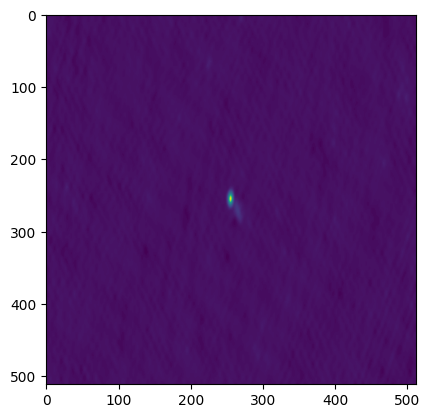

In [3]:
import matplotlib.pyplot as plt

for images in trainloader:
    to_pil_im = transforms.ToPILImage()
    im = to_pil_im(images[0])
    plt.imshow(im)
    plt.show()
    break

In [4]:
import json
from collections import Counter

with open('val_preds.json') as f:
    contents = json.load(f)

res = dict(Counter(contents.values()))

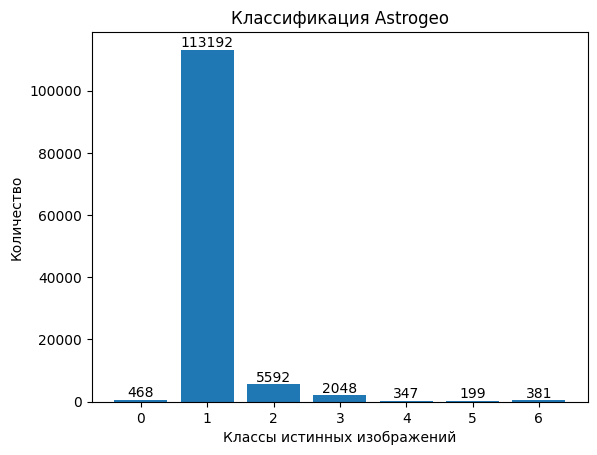

In [5]:
bar = plt.bar(res.keys(), res.values())
plt.bar_label(bar, labels=res.values())
plt.xlabel('Классы истинных изображений')
plt.ylabel('Количество')
plt.title('Классификация Astrogeo')
plt.show()

In [6]:
from astroquery.cadc import Cadc
cadc = Cadc()
for collection, details in sorted(cadc.get_collections().items()):
   print(f'{collection} : {details}')

APASS : {'Description': 'The APASS collection at the CADC', 'Bands': ['Optical', 'Infrared|Optical', '']}
BLAST : {'Description': 'The BLAST collection at the CADC', 'Bands': ['', 'Millimeter']}
BRITE-Constellation : {'Description': 'The BRITE-Constellation collection at the CADC', 'Bands': ['Optical']}
CFHT : {'Description': 'The CFHT collection at the CADC', 'Bands': ['Infrared|Optical', 'Optical|UV|EUV|X-ray|Gamma-ray', 'Infrared|Optical|UV', '', 'Optical', 'Infrared']}
CFHTMEGAPIPE : {'Description': 'The CFHTMEGAPIPE collection at the CADC', 'Bands': ['', 'Infrared|Optical', 'Optical']}
CFHTTERAPIX : {'Description': 'The CFHTTERAPIX collection at the CADC', 'Bands': ['Infrared|Optical', 'Optical', 'Infrared']}
CFHTWIRWOLF : {'Description': 'The CFHTWIRWOLF collection at the CADC', 'Bands': ['Infrared']}
CGPS : {'Description': 'The CGPS collection at the CADC', 'Bands': ['Infrared', 'Radio', 'Millimeter', '', 'Millimeter|Infrared']}
CHANDRA : {'Description': 'The CHANDRA collection 

In [12]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.cadc import Cadc

cadc = Cadc()
coords = SkyCoord(10, 20, unit='deg')
radius = 1 * u.deg
readable_objs = cadc.get_images_async(coords, radius, collection='VLASS')
len(readable_objs)

15

In [8]:
hdu = readable_objs[0].get_fits()
hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     217   (3722, 3651, 1, 1)   float32   


In [14]:
# import matplotlib.pyplot as plt
# import numpy as np


# for obj in readable_objs:
#     hdu = obj.get_fits()
#     image = hdu[0].data
#     image = image.squeeze()
#     plt.imshow(image, cmap='magma')
#     plt.colorbar()
#     plt.show()